In [5]:
import numpy as np 
import pandas as pd 
import sys
from pandas import Series,DataFrame
from sklearn.linear_model import LinearRegression

from bqplot import pyplot as plt

import bokeh

import time
import urllib
import matplotlib.dates as mdates


import csv

from math import pi
from numpy import random
from numpy.random import randn

from io import StringIO
from matplotlib.pyplot import *
from scipy import stats
from pandas_datareader import DataReader
from datetime import datetime
from __future__ import division

import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')


%config SQL.conn_name = 'spark'
%matplotlib inline

sc = SparkContext.getOrCreate()

from pyspark import SparkContext , SparkConf
from pyspark.sql import SQLContext , HiveContext



from pyspark.sql import HiveContext
SQLContext = HiveContext


In [2]:
df = sqlContext.read.format("uber-data.csv").options(header = 'True' , inferschema = 'true')

NameError: name 'sqlContext' is not defined

In [5]:
exampleDF = sqlContext.read.json("example_2.json")
exampleDF.show()

+--------------------+
|     _corrupt_record|
+--------------------+
|                   {|
|           "quiz": {|
|          "sport": {|
|             "q1": {|
|                "...|
|                "...|
|                 ...|
|                 ...|
|                 ...|
|                 ...|
|                  ],|
|                "...|
|                   }|
|                  },|
|          "maths": {|
|             "q1": {|
|                "...|
|                "...|
|                 ...|
|                 ...|
+--------------------+
only showing top 20 rows



In [6]:
retailDF = sqlContext.read.json("retail_food_markets.json")
retailDF.show()

+--------------------+
|     _corrupt_record|
+--------------------+
|                   {|
|          "meta" : {|
|          "view" : {|
|      "id" : "9a8...|
|      "name" : "R...|
|      "attributio...|
|      "attributio...|
|      "averageRat...|
|      "category" ...|
|      "createdAt"...|
|      "descriptio...|
|      "displayTyp...|
|      "downloadCo...|
|      "indexUpdat...|
|      "newBackend...|
|      "numberOfCo...|
|      "oid" : 900...|
|      "publicatio...|
|      "publicatio...|
|      "publicatio...|
+--------------------+
only showing top 20 rows



In [9]:
retailDF.printSchema()

root
 |-- _corrupt_record: string (nullable = true)



In [15]:
deptList = [{'name' : 'Sales' , 'id' : "100"} ,
           {'name' : 'Enginnering' , 'id' : "200"}]

deptDf = pyspark.sql.Row(deptList)

NameError: name 'pyspark' is not defined

In [9]:
from pyspark.sql import HiveContext
hive_context = HiveContext(sc)

from pyhive import hive 
conn = hive.Connection( host = "YOUR_hIVE_HOST" , port=PORT , username = "YOU" )

ModuleNotFoundError: No module named 'thrift'

In [3]:
TOTAL = 1000000
dots = sc.parallelize([2.0 * np.random.random(2) - 1.0 for i in range(TOTAL)]).cache()
print("Number of random points:", dots.count())

stats = dots.stats()
print('Mean:', stats.mean())
print('stdev:', stats.stdev())

Number of random points: 1000000
Mean: [ 0.00059407 -0.00032993]
stdev: [ 0.57691538  0.57707745]


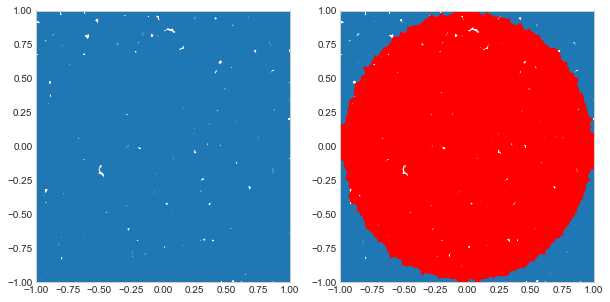

In [4]:
%matplotlib inline
from operator import itemgetter
from matplotlib import pyplot as plt

plt.figure(figsize = (10, 5))

# Plot 1
plt.subplot(1, 2, 1)
plt.xlim((-1.0, 1.0))
plt.ylim((-1.0, 1.0))

sample = dots.sample(False, 0.01)
X = sample.map(itemgetter(0)).collect()
Y = sample.map(itemgetter(1)).collect()
plt.scatter(X, Y)

# Plot 2
plt.subplot(1, 2, 2)
plt.xlim((-1.0, 1.0))
plt.ylim((-1.0, 1.0))

inCircle = lambda v: np.linalg.norm(v) <= 1.0
dotsIn = sample.filter(inCircle).cache()
dotsOut = sample.filter(lambda v: not inCircle(v)).cache()

# inside circle
Xin = dotsIn.map(itemgetter(0)).collect()
Yin = dotsIn.map(itemgetter(1)).collect()
plt.scatter(Xin, Yin, color = 'r')

# outside circle
Xout = dotsOut.map(itemgetter(0)).collect()
Yout = dotsOut.map(itemgetter(1)).collect()
plt.scatter(Xout, Yout)

# O'Reilly

In [6]:
rdd = sc.parallelize([1,2,3,4,5])

doubled = rdd.map



In [26]:
rdd.toDebugString()

b'(4) ParallelCollectionRDD[3] at parallelize at PythonRDD.scala:489 []'

In [12]:
text = sc.textFile("Dividends.txt" , minPartitions = 20)

text

Dividends.txt MapPartitionsRDD[9] at textFile at NativeMethodAccessorImpl.java:0

In [ ]:
text.collect()

In [23]:
numbers = sc.parallelize(range(20))

#numbers.collect()
#numbers.sum()
#numbers.count()
#numbers.take(3)
#numbers.saveAsTextFile("our_numbers.txt")
numbers.toDebugString()

b'(4) PythonRDD[29] at RDD at PythonRDD.scala:48 []\n |  ParallelCollectionRDD[28] at parallelize at PythonRDD.scala:489 []'

In [28]:
combined = numbers.union(rdd)
combined.toDebugString

<bound method RDD.toDebugString of UnionRDD[33] at union at NativeMethodAccessorImpl.java:0>

In [ ]:
numb = sc.parallelize(range(1000))
result = numb.map(lambda x: x * 5)
result.collect()

In [36]:
numb.persist
numb.is_cached

False